## Titanic - Machine Learning from Disaster
###### Data Science challenge from Kaggle

The "Titanic: Machine Learning from Disaster" dataset on Kaggle is a classic example used to teach and practice machine learning, specifically classification. Its structure is designed to give a beginner a comprehensive view of the field, allowing them to develop essential skills in exploring real data and using the fundamental tools for manipulating data, visualizing information, and "teaching" a machine through a learning model.

Although most people are familiar with the history of the Titanic — the "unsinkable" ship that, on its maiden voyage, led to the deaths of over 1,500 people, largely due to a lack of lifeboats — the available data reveals more than just tragic chance. It shows that despite an element of luck, survival was not random. Upon closer inspection, the dataset contains hidden information, indicating that certain groups of people had a significantly greater chance of being saved. Data science allows us to go beyond the historical narrative and discover, in the real numbers, who truly had a better "luck" of surviving.

##### Development Sequence
1. Understanding the Problem
2. Importing the Data
3. Data Exploration
4. Model, predict and solve
5. Results and Performance Analysis

### 1. **Understanding the Problem**

The Titanic, built between 1909 and 1911 at a cost of $7.5 million, was the largest ship of its time, designed to carry up to 2,435 passengers and 892 crew. On April 10, 1912, it began its maiden voyage from Southampton to New York. Just four days later, the ship struck an iceberg and sank, resulting in the deaths of 1,502 of the 2,224 people on board. This tragic event was a combination of natural factors and significant human error, primarily due to negligence and overconfidence. While the ship's design allowed for lifeboats for 1,178 people, this was still far short of the number needed for everyone on board.

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The sinking of the Titanic resulted in a tragic loss of life. Understanding the factors that influenced survival is crucial, and *machine learning can help* analyze this.

##### The Goal
Build a model that can accurately predict the "Survived" status of passengers in a separate test dataset, using the information provided in the training dataset.

### 2. **Importing the Data**

Import the necessary libraries like pandas, numpy, seaborn, and matplotlib, and load the train and test datasets.

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Allow to visualize all columns
pd.options.display.max_columns = None

The competition provides two main datasets:

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#### **Variables study**

In [3]:
# Verifying the shape of the train DataFrame
train_df.shape

(891, 12)

The train set has 891 entries (or rows) and 12 variables (or columns). This is the dataset you'll use to train your machine learning model. It contains the Survived column, which is the target variable you need to predict.

In [4]:
# Verifying the shape of the test DataFrame
test_df.shape

(418, 11)

The test set has 418 entries and 11 variables. This is the dataset where you will apply your trained model to make predictions. Notice that it has one less variable than the train set. That's because it's missing the Survived column, as your goal is to predict those values for your final submission.

#### **Data Dictionary**

* *PassengerId:* Unique identifier for each passenger.
* *Survived:* Whether the passenger survived (1) or perished (0) - this is the target variable for our model.
* *Pclass:* Passenger class.
    * 1 = 1st Class (Upper floors in the ship)
    * 2 = 2nd Class (Middle floors in the ship)
    * 3 = 3rd Class (Lower floors in the ship)
* *Name:* Passenger's name.
* *Sex:* Passenger's gender.
* *Age:* Passenger's age.
    * Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* *SibSp:* Number of siblings/spouses aboard.
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* *Parch:* Number of parents/children aboard.
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
* *Ticket:* Ticket number.
* *Fare:* Passenger fare.
* *Cabin:* Cabin number.
* *Embarked:* Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Using the patterns you find in the *train.csv* data, predict whether the other 418 passengers on board (found in *test.csv*) survived.

### **3. Data Exploration**

In an initial analysis it's really important to verify each variable separately, paying attention to its name,type, searching for missing values, outliers and its statistical characteristics.

In [5]:
# preview the train DataFrame
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Ticket is a mix of numeric and alphanumeric data types.

* Cabin is alphanumeric.

* Name feature may contain errors or typos.

In [6]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Titanic Survived')

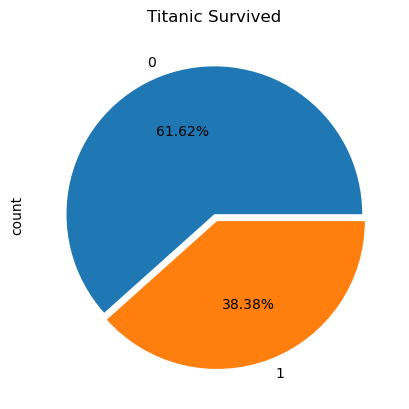

In [7]:
explode = [0, 0.05]
train_df['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)
plt.title("Titanic Survived")

In [8]:
# Name and type of each variable in the train DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Statistical summary of the numerical variables
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **Count:** the number of entries in a particular column, we can see that Age is incomplete.

* **Mean:** the average of each column. E.g. The average fare us 32.2 USD

* **Std:** standard deviation of all data. A low standard deviation means that most of the numbers are close to the average, while a high standard deviation means that the numbers are more spread out. Again ‘Fare’ has a high standard deviation.

* **Min:** the minimum value of each column. For example, the lowest ‘Fare’ shows 0 USD, which means ‘Fare’ is unavailable for some passengers. The model may not perform well with 0 for some passengers. Hence we will need to focus on the ‘Fare’ column before modeling.

* **Max:** the maximum value of the column. For example, the highest ‘Fare’ shows 512.33 USD. The mean of the ‘Fare’ column says USD 32.20. We see there is a huge difference in fare. It could be because of the ‘Pclass’ they were traveling.

* **25%, 50% & 75%:** the 1st, 2nd, and 3rd quartile of the data. Quartile in statistics is a type of quantile that divides the number of ordered data points into four equal groups. 1st quartile is the middle number between the smallest number and the median. 2nd quartile is the median of the dataset. 3rd quartile is the middle value between the median and the highest value.

By default, *.describe()* only provides statistics for numerical columns. The *include=['O']* argument tells pandas to focus on columns with the 'object' dtype, which typically represents text or categorical data.

In [10]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


Given the 891 entries in the training dataset, the count feature immediately reveals which variables have missing data. The Cabin column has the largest number of missing values, followed by Age and Embarked. While the min and max values for the numerical features don't show any obvious signs of extreme outliers, a more detailed visual inspection would be necessary to be certain.

In [11]:
# Check the percentage of missing values for each variable
(train_df.isnull().sum()/train_df.shape[0]).sort_values(ascending=False) * 100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64

The statistical summary for categorical variables also provides key information:

* The Name variable has a unique entry for every passenger, which is expected.

* The Sex variable shows two unique values (male and female), with males making up the majority of passengers.

* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

* The most common port of embarkation, as seen in the Embarked variable, was Southampton (S).

#### Can we find any statistical patterns in the data that predict who survived?

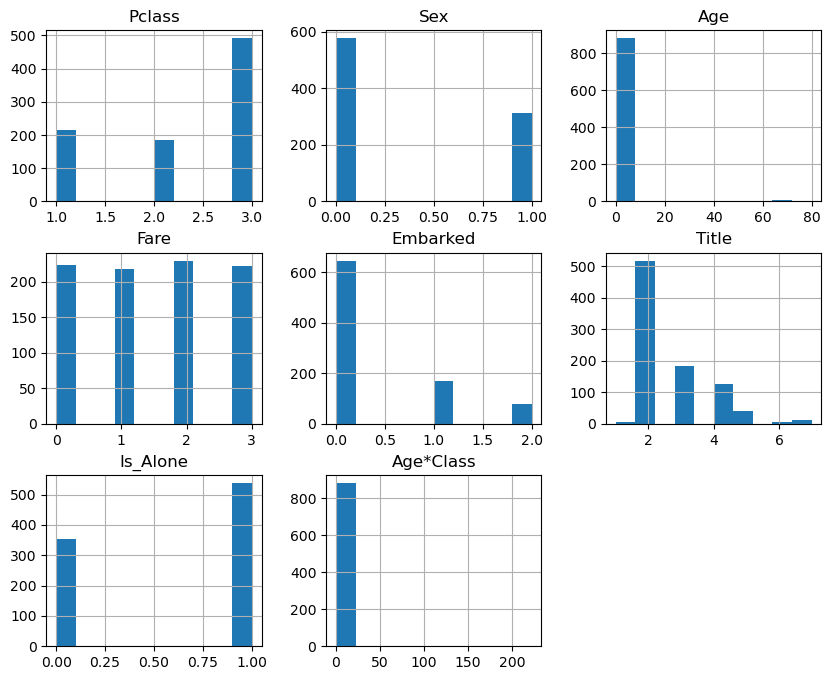

In [85]:
# Plotting histograms of numerical variables in the train DF
train_df.hist(figsize=(10, 8));

Based on the histograms, most of the numerical variables in the dataset don't appear to follow a specific statistical distribution. The exception is the PassengerId, which has a uniform distribution because each passenger is assigned a unique, sequential number.

To understand the impact of individual variables on survival rates, we can use the pandas groupby method. This powerful technique allows us to easily calculate survival probabilities and other statistics for different groups, such as passengers based on their sex, class, or port of embarkation.

##### **Target Variable vs. Important Features**

In [13]:
# Survival Probabilities crossed with variables Sex, Pclass and Embarked
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


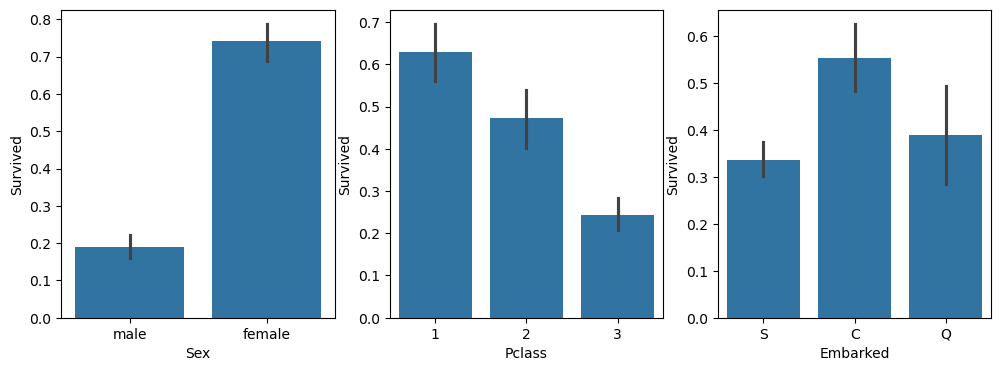

In [17]:
# Barplots of Survived vs. Sex, Pclass e Embarked variables
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axis3);

When a key variable like **Age** is a continuous number with a wide range of values, a single chart isn't enough to understand its distribution. To properly visualize this type of data and reveal its underlying patterns, a histogram or a density plot is a much better choice.

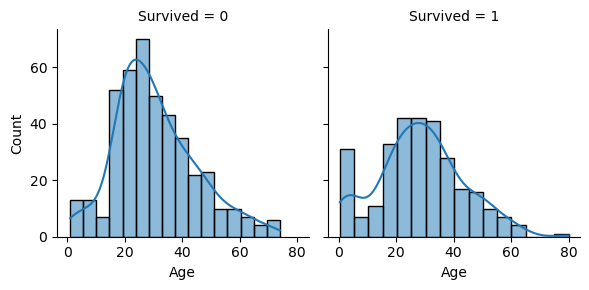

In [18]:
# Survival chances based on the Age data distribution
age_survived = sns.FacetGrid(train_df, col='Survived')
age_survived.map(sns.histplot, 'Age', kde=True)

The data reveals a clear and profound disparity in survival rates based on **Sex**, with approximately 70% of female passengers surviving compared to just 20% of males. This strongly aligns with the historical account of "women and children first."

A passenger's socioeconomic status, indicated by their ticket class (**Pclass**), was another critical factor, with those in first class having a significantly higher chance of survival. Furthermore, the **port of embarkation** also showed a pattern, as Cherbourg had the highest survival rate, possibly due to its connection with wealthier passengers.

The analysis of Age provides even more nuanced insights. Infants (Age <= 4) and the oldest passenger (Age = 80) had notably high survival rates, while a large number of passengers in the 15-25 age group did not survive.

Given these findings, it's clear that **Age** is a crucial variable for our model. To make it more effective, we must first complete the missing values in the column. Then, we need to categorize passengers into distinct age bands, as this will help the model learn from the specific survival patterns observed across different age groups. By preparing the data in this way, our model can effectively combine the insights from all of these variables to predict survival.

After analyzing each variable in isolation, the next crucial step is to explore the relationships and correlations between them.
This shift from a single-variable to a multi-variable analysis is essential for uncovering deeper insights and building a more effective model.

##### **Converting a categorical feature**
The Sex column has been successfully transformed into a numerical feature, with females represented by 1 and males by 0. This is a critical step in the data preparation process, as machine learning models require all input variables to be in a numerical format to make predictions.

In [19]:
# Converting the Sex column to numerical values
combine = [train_df, test_df]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


##### **Correlating numerical and ordinal features**

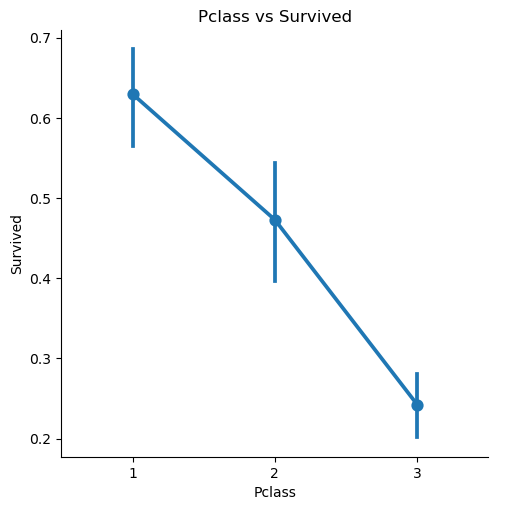

In [20]:
# Comparing Pclass vs Survived.
sns.catplot(x='Pclass', y='Survived', data=train_df, kind='point')
plt.title("Pclass vs Survived")
plt.show()

First Class passengers had the highest Survival rate when compared to the other class passengers.

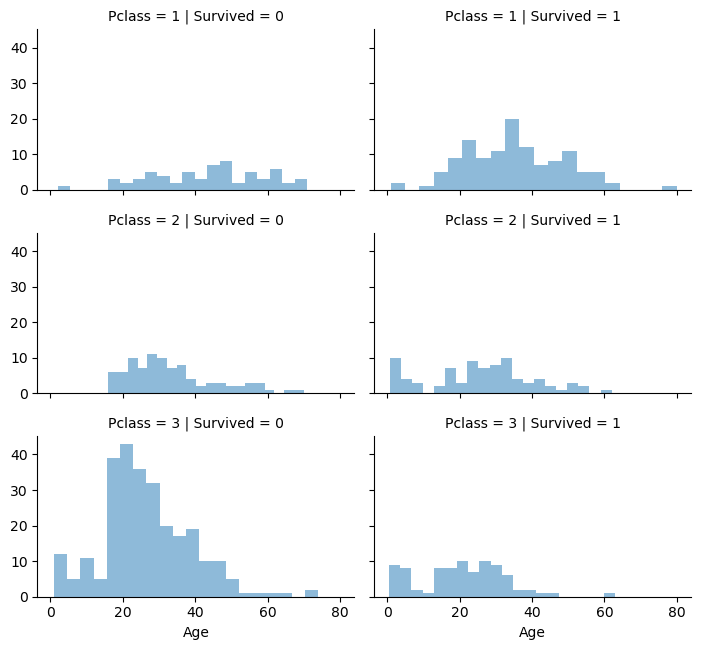

In [21]:
# Pclass vs Age.
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Multivariate analysis offers a deeper and more comprehensive understanding of variable relationships than bivariate analysis. While the latter is limited by assuming that the relationship between two variables is independent of all others, this can lead to incomplete or misleading conclusions.

The Titanic dataset provides a perfect illustration of this. Although survival is strongly correlated with sex, this relationship is significantly influenced by a third variable: age. A deeper, multivariate analysis reveals that a person's chances of survival depended on the combined effect of their sex and age, aligning with the historical "women and children first" protocol.

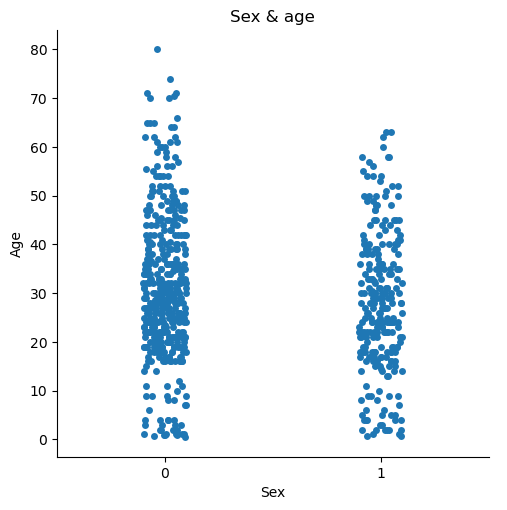

In [22]:
# Comparing Sex and Age.
sns.catplot(x='Sex', y='Age', data=train_df)
plt.title("Sex & age")
plt.show()

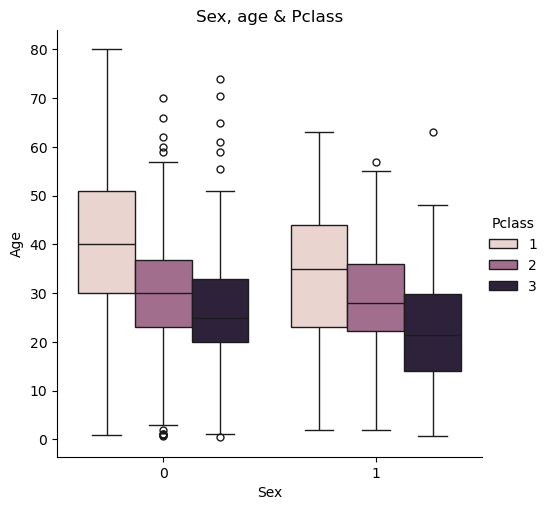

In [23]:
# Including the third parameter “Pclass” 
sns.catplot(x='Sex', y='Age', data=train_df, kind='box', hue='Pclass')
plt.title("Sex, age & Pclass")
plt.show()

The plot suggests a clear demographic pattern: most older passengers were traveling in first class, which implies a correlation between age and socioeconomic status. Conversely, a large number of young adults, particularly those between 25 and 35, were concentrated in second and third classes.

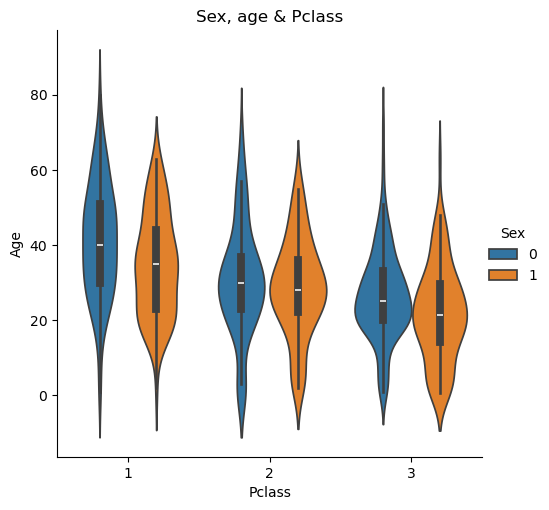

In [24]:
sns.catplot(x='Pclass', y='Age', data=train_df, kind='violin', hue='Sex')
plt.title("Sex, age & Pclass")
plt.show()

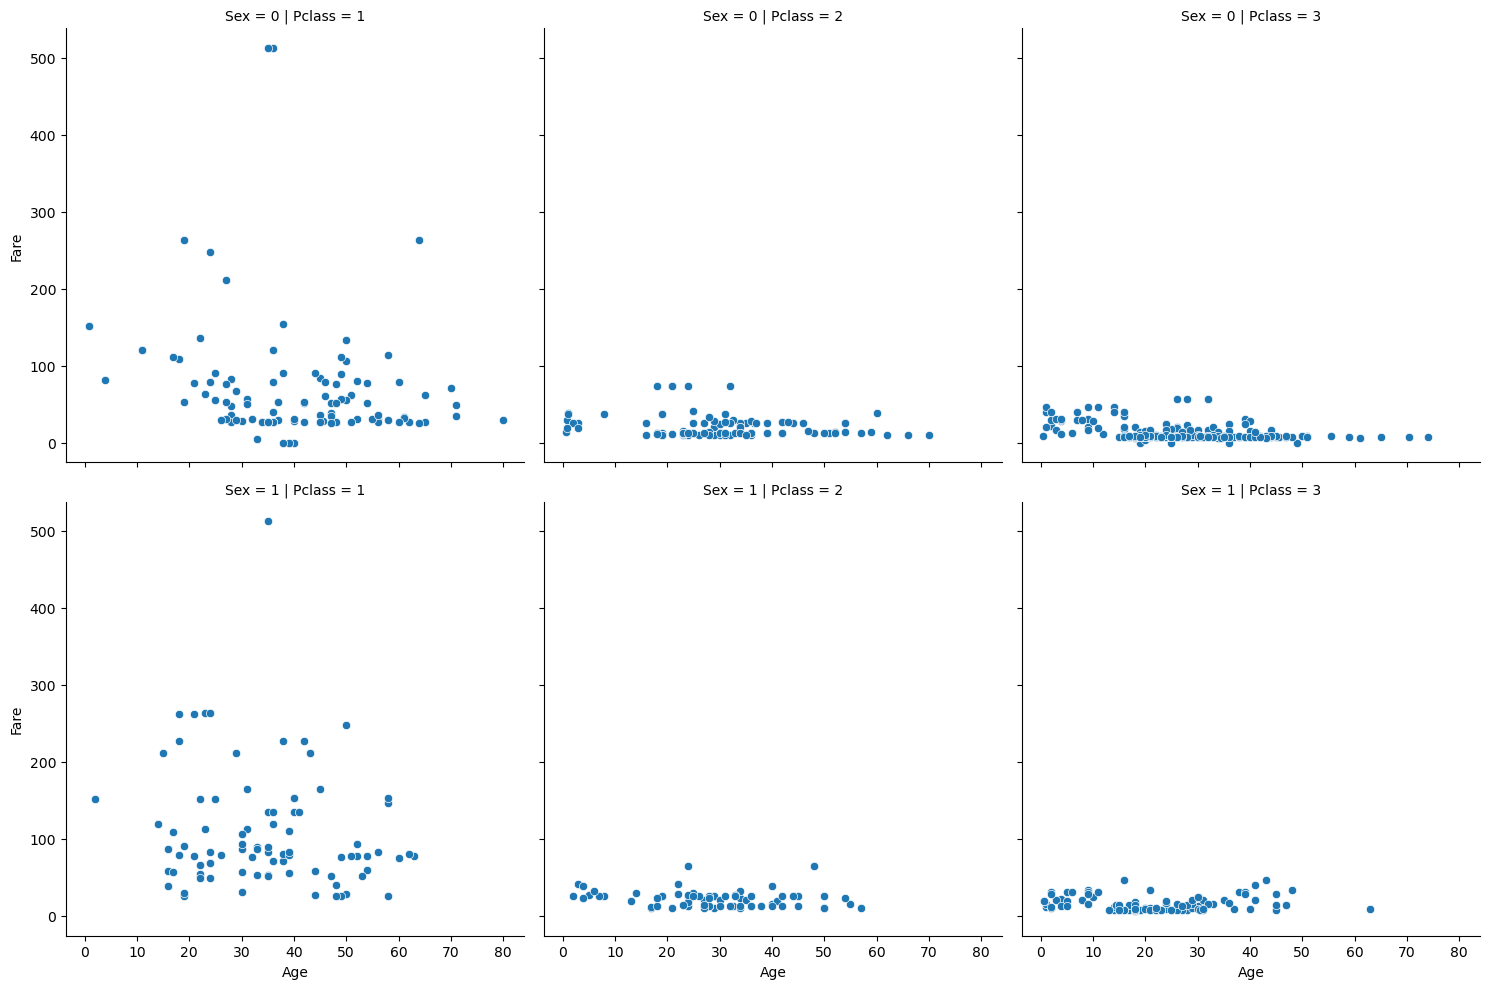

In [25]:
sns.relplot(x='Age', y='Fare', data=train_df, row='Sex', col='Pclass')
plt.show()

The plots reveal several key insights into the Titanic's passenger demographics and their socioeconomic status. We can observe that while there were more male than female passengers in first class, the average Fare for female passengers in that class was notably higher. There was also no significant difference in fares paid between second and third-class passengers. The data further shows a clear correlation between age and class, as a very small number of children were in first class, while the third class had the highest concentration of children. Furthermore, most passengers in the second and third classes were young adults, aged between 20 and 40.

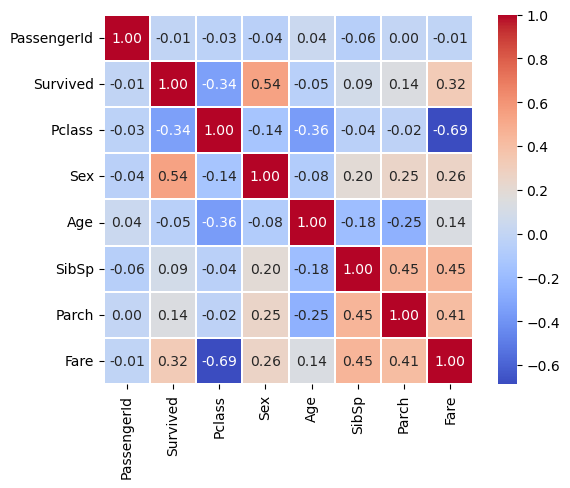

In [26]:
# Plotting a heatmap for numerical variables
numerical_df = train_df.select_dtypes(include='number')
sns.heatmap(numerical_df.corr(method='spearman'), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

These two analytical approaches help us identify relationships between different variables and evaluate their significance. By examining these correlations, we can determine which features are most important to include in our machine learning model, ensuring that our final solution is built on meaningful patterns rather than random chance.

#### **Correcting by dropping features**

Since cabin has a lot of NaN values, we will create a new feature called has cabin which will have 1 for Cabin a 0 for NaN values.

In [27]:
combine = [train_df, test_df]

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

#### **Creating new feature extracting from existing**

In [28]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [30]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [65]:
# Extract each passenger's title from the Name column

train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Rev': 'Rare',
    'Dona': 'Rare',
    'Dr': 'Rare'
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Rev': 'Rare',
    'Dona': 'Rare',
    'Dr': 'Rare'
})

In [32]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Master,40,0.575000
1,Military,5,0.400000
2,Miss,185,0.702703
3,Mr,517,0.156673
4,Mrs,126,0.793651
5,Noble,5,0.600000
6,Rare,13,0.230769


In [33]:
# Converting the categorical titles to ordinal.
title_mapping = {"Military": 1, "Mr": 2, "Miss": 3, "Mrs": 4, "Master": 5, "Noble": 6, "Rare": 7}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,2


In [34]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### **Completing a numerical continuous feature**

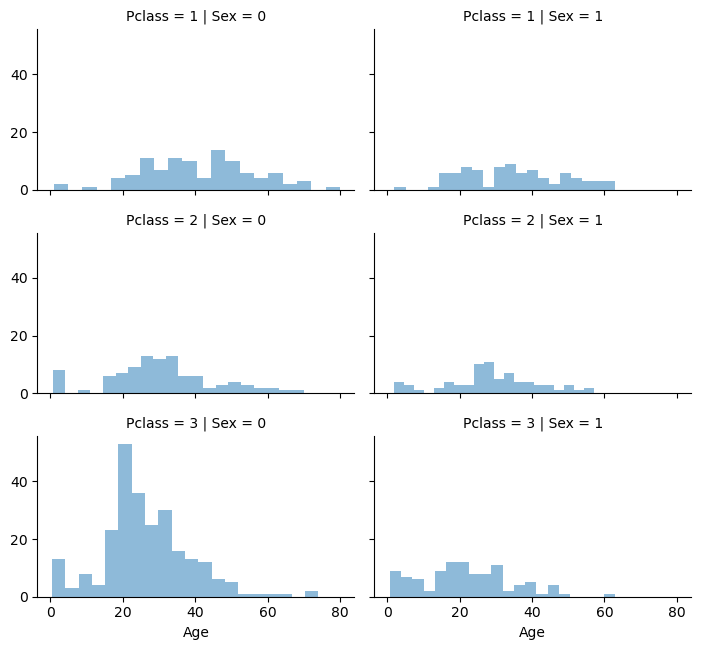

In [35]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Creating an empty matrix (guess_ages) to store the estimated median ages for each of the six possible combinations of Sex (0 and 1) and Pclass (1, 2 and 3).

In [36]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

We then iterate through each of these combinations to calculate the median age for each specific group and store the resulting value.

In [37]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            
            # Use np.isnan() to check if the median is NaN
            if np.isnan(age_guess):
                # If median is NaN, use the overall median age
                age_guess = dataset['Age'].median()

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    # Use fillna() to handle any remaining NaN values before converting to int
    dataset['Age'] = dataset['Age'].fillna(0).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,2
1,1,1,1,38,1,0,71.2833,C,4
2,1,3,1,26,0,0,7.9250,S,3
3,1,1,1,35,1,0,53.1000,S,4
4,0,3,0,35,0,0,8.0500,S,2


Locating all the missing Age values and replacing each with the corresponding pre-calculated median age based on the passenger's Sex and Pclass.

This method ensures that the imputed ages are as realistic as possible for each passenger's profile. As a result, the Age column is now complete and has been successfully converted to an integer type, making it ready for use in our machine learning model.

To determine the correlation with survival, we will create distinct age groups ('Age_Cut') by categorizing the continuous Age variable. This approach will allow us to analyze how different age brackets influenced a passenger's chance of survival.

In [38]:
train_df['Age_Cut'] = pd.cut(train_df['Age'], 5)
train_df[['Age_Cut', 'Survived']].groupby(['Age_Cut'], as_index=False, observed=True).mean().sort_values(by='Age_Cut', ascending=True)

,Age_Cut,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [39]:
# Replacing Age with ordinals based on these groups.
for dataset in combine:    
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_Cut
0,0,3,0,1,1,0,7.2500,S,2,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,4,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,3,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,4,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,2,"(32.0, 48.0]"


In [40]:
train_df = train_df.drop(['Age_Cut'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,2
1,1,1,1,2,1,0,71.2833,C,4
2,1,3,1,1,0,0,7.9250,S,3
3,1,1,1,2,1,0,53.1000,S,4
4,0,3,0,2,0,0,8.0500,S,2


#### **Create new feature combining existing features**
Create the *Family_Size* variable by adding the *SibSp* and *Parch* columns and adding 1. Use Family_Size to create the *Is_Alone* variable, which indicates if the passenger traveled alone (1) or not (0).

In [41]:
# Creating new feature for FamilySize = Parch + SibSp.
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [42]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [43]:
# Creating another feature 
for dataset in combine:
    dataset['Is_Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Is_Alone'] = 1

train_df[['Is_Alone', 'Survived']].groupby(['Is_Alone'], as_index=False).mean()

,Is_Alone,Survived
0,0,0.505650
1,1,0.303538


In [44]:
# Droping Pearch, SibSp and Family_Size 
train_df = train_df.drop(['Parch', 'SibSp', 'Family_Size'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'Family_Size'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone
0,0,3,0,1,7.2500,S,2,0
1,1,1,1,2,71.2833,C,4,0
2,1,3,1,1,7.9250,S,3,1
3,1,1,1,2,53.1000,S,4,0
4,0,3,0,2,8.0500,S,2,1


In [45]:
# Create a new variable Age*Class by multiplying Age and Pclass to explore potential interactions between them.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


#### **Completing a categorical feature**

The Embarked feature, which indicates the port of embarkation, has two missing values in the training dataset. To handle this, we will apply a simple imputation method by filling these nulls with the mode, or most frequently occurring port.

In [46]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [47]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### **Converting categorical feature to numeric**

In [48]:
# Now converting the Embarked feature by creating a new numeric Port feature.
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age*Class
0,0,3,0,1,7.2500,0,2,0,3
1,1,1,1,2,71.2833,1,4,0,2
2,1,3,1,1,7.9250,0,3,1,3
3,1,1,1,2,53.1000,0,4,0,2
4,0,3,0,2,8.0500,0,2,1,6


#### **Quick completing and converting a numeric feature**

In [49]:
# Let's round off the fare to two decimals as it represents currency.
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].dropna().median())
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age*Class
0,892,3,0,2,7.8292,2,2,1,6
1,893,3,1,2,7.0000,0,4,0,6
2,894,2,0,3,9.6875,2,2,1,6
3,895,3,0,1,8.6625,0,2,1,3
4,896,3,1,1,12.2875,0,4,0,3


In [50]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 4)
train_df[['Fare_Cut', 'Survived']].groupby(['Fare_Cut'], as_index=False, observed=True).mean().sort_values(by='Fare_Cut', ascending=True)

,Fare_Cut,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [51]:
# Convert the Fare feature to ordinal values based on the Fare_Band.
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['Fare_Cut'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age*Class
0,0,3,0,1,0,0,2,0,3
1,1,1,1,2,3,1,4,0,2
2,1,3,1,1,1,0,3,1,3
3,1,1,1,2,3,0,4,0,2
4,0,3,0,2,1,0,2,1,6
5,0,3,0,1,1,2,2,1,3
6,0,1,0,3,3,0,2,1,3
7,0,3,0,0,2,0,5,0,0
8,1,3,1,1,1,0,4,0,3
9,1,2,1,0,2,1,4,0,0


In [52]:
# The test dataset
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Is_Alone,Age*Class
0,892,3,0,2,0,2,2,1,6
1,893,3,1,2,0,0,4,0,6
2,894,2,0,3,1,2,2,1,6
3,895,3,0,1,1,0,2,1,3
4,896,3,1,1,1,0,4,0,3
5,897,3,0,0,1,0,2,1,0
6,898,3,1,1,0,2,3,1,3
7,899,2,0,1,2,0,2,0,2
8,900,3,1,1,0,1,4,1,3
9,901,3,0,1,2,0,2,0,3


*You have performed the following steps to prepare the data for the model:*

**Data Correction:**

You removed the Ticket and Cabin columns as they had many missing values or were considered irrelevant for the model.

**Feature Engineering:**
* **Title:** A new Title variable was created from the passengers' Name and less common titles were grouped into new categories.
* **Family Size:** A new Family_Size variable was created by adding Parch and SibSp and adding 1. You also created an Is_Alone variable from Family_Size.
* **Age:** Missing Age values were imputed using the median age for each combination of Pclass and Sex, which is a more accurate imputation method. The Age was then converted into ordinal bands to better capture its correlation with survival.

**Feature Conversion:**
* **Sex:** The Sex variable was converted into a numeric attribute (0 for male and 1 for female).
* **Embarked:** The two missing values in the Embarked column were filled with the most common port (S). The categorical variable was then converted into numerical values (0, 1, 2).
* **Fare:** The missing fare value in the test set was filled with the median. The Fare was then converted into ordinal bands for the model.

### **4. Model, predict and solve**
So far, the project has progressed from the initial data import and variable explanations to data exploration, where we've tested hypotheses and analyzed the most relevant features. A data science project is an iterative workflow rather than a linear, step-by-step process. It often requires revisiting previous stages to search for new information, refine hypotheses, and try different analytical methods, particularly during the data exploration phase. The current objective is to process the data as needed, which, with the help of the pandas library, can be done efficiently before feeding it into a machine learning model.

After completing all the preprocessing steps, you should separate the Survived target variable from the training dataset and then combine the training and test DataFrames into a single one for consistent processing. The final result will be a single DataFrame with all the clean data, ready to be used in your model.

In [53]:
# Saving the variable 'Survived' before removing it
target = train_df['Survived'].copy()
train_df = train_df.drop(['Survived'], axis=1)

# Define X_test
X_test = test_df.drop('PassengerId', axis=1)

The challenge is a classic binary classification problem (predicting 0 for "did not survive" and 1 for "survived").

The most popular models for binary classification problems, which is the type of problem the Titanic challenge presents (predicting 0 for "did not survive" and 1 for "survived"), are:

* Logistic Regression

* KNN (k-Nearest Neighbors)

* Support Vector Machines (SVM)

* Naive Bayes

* Decision Tree

* Random Forest

* Perceptron

* Artificial Neural Network

In [54]:
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

By importing this list of classifiers, we are preparing the tools necessary to:

* Train our models on the cleaned and preprocessed Titanic data.

* Predict the survival outcomes for the test set.

* Evaluate and compare the performance of different algorithms to find the best one for the challenge.

This collection of models, from simple ones like Logistic Regression and Decision Trees to more advanced ensemble methods like Random Forest, gives you a great toolkit for finding the most effective predictive solution.

#### **Logistic regression**

A simple linear model, ideal for use as a baseline, it measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features).

In [55]:
# Creating a Logistic Regression Model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train_df, target)

# Verifying the model accuracy
acc_lr = round(lr_model.score(train_df, target) * 100, 2)
print(f'Logistic Regression Model Accuracy: {acc_lr} %')

Logistic Regression Model Accuracy: 80.13 %


#### **KNN (k-Nearest Neighbors)**

An algorithm that classifies a new data point based on the majority class of its k nearest neighbors. It is simple but can be sensitive to noisy data.

In [81]:
# Creating a KNN Model
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(train_df, target)
Y_pred = knn.predict(X_test)

# Verifying the model accuracy
acc_knn = round(knn.score(train_df, target) * 100, 2)
print(f'KNN (k-Nearest Neighbors) Model Accuracy: {acc_knn} %')

KNN (k-Nearest Neighbors) Model Accuracy: 84.51 %


##### **Support Vector Machines (SVM)**

A powerful model that seeks to find the optimal hyperplane to separate data into classes, maximizing the margin between them.

In [57]:
# Creating a SVM Model
svc = SVC()
svc.fit(train_df, target)
Y_pred = svc.predict(X_test)

# Verifying the model accuracy
acc_svc = round(svc.score(train_df, target) * 100, 2)
print(f'Support Vector Machines (SVM) Model Accuracy: {acc_svc} %')

Support Vector Machines (SVM) Model Accuracy: 78.23 %


#### **Naive Bayes**
A probabilistic classifier based on Bayes' Theorem. It is often used in text classification problems but can also be applied to other types of data.

In [58]:
# Creating a Naive Bayes Model
gaussian = GaussianNB()
gaussian.fit(train_df, target)
Y_pred = gaussian.predict(X_test)

# Verifying the model accuracy
acc_gaussian = round(gaussian.score(train_df, target) * 100, 2)
print(f'Naive Bayes Model Accuracy: {acc_gaussian} %')

Naive Bayes Model Accuracy: 71.6 %


#### **Decision Tree**
An intuitive model that splits data based on rules, forming a tree structure. It is easy to understand and visualize.

In [78]:
# Creating a Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=7)
dt_model.fit(train_df, target)
Y_pred = dt_model.predict(X_test)

# Verifying the model accuracy
acc_dt = round(dt_model.score(train_df, target) * 100, 2)
print(f'Decision Tree Model Accuracy: {acc_dt} %')

Decision Tree Model Accuracy: 85.3 %


#### **Random Forest**
An ensemble model, which combines multiple decision trees to improve accuracy and stability. It is one of the most common and effective choices in data competitions.

In [60]:
# Creating a Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_df, target)
Y_pred = random_forest.predict(X_test)

# Verifying the model accuracy
random_forest.score(train_df, target)
acc_random_forest = round(random_forest.score(train_df, target) * 100, 2)
print(f'Random Forest Model Accuracy: {acc_random_forest} %')

Random Forest Model Accuracy: 86.76 %


#### **Perceptron**
An algorithm for binary classification learning. It is the simplest form of a neural network and a building block for more complex models.

In [61]:
# Creating a Perceptron Model
perceptron = Perceptron(max_iter=10000)
perceptron.fit(train_df, target)
Y_pred = perceptron.predict(X_test)

# Verifying the model accuracy
acc_perceptron = round(perceptron.score(train_df, target) * 100, 2)
print(f'Perceptron Model Accuracy: {acc_perceptron} %')

Perceptron Model Accuracy: 75.42 %


#### **Artificial Neural Network**
More advanced models inspired by the human brain, capable of learning complex patterns in data. They can be very powerful but also require more data and computational power.


In [62]:
# Creating a Artificial Neural Network Model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 20), activation='relu', max_iter=1000)
mlp.fit(train_df, target)
Y_pred_mlp = mlp.predict(X_test)

# Verifying the model accuracy
acc_mlp = round(mlp.score(train_df, target) * 100, 2)
print(f"Artificial Neural Network Model Accuracy: {acc_mlp}%")

Artificial Neural Network Model Accuracy: 85.75%


### **5. Results and Performance Analysis**

In [82]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree', 'Perceptron', 'Artificial Neural Network'],
    
    'Score': [acc_svc, acc_knn, acc_lr, 
              acc_random_forest, acc_gaussian, acc_dt, acc_perceptron, acc_mlp]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
7,Artificial Neural Network,85.75
5,Decision Tree,85.30
1,KNN,84.51
2,Logistic Regression,80.13
0,Support Vector Machines,78.23
6,Perceptron,75.42
4,Naive Bayes,71.60


The results show that the Random Forest model performed the best, closely followed by the Artificial Neural Network and the Decision Tree. This is a common outcome for this type of tabular dataset, where tree-based models are often very effective at finding complex, non-linear patterns.